# **HEART DISEASE ANALYSIS** 

In this project, we will analyze [Cardiovascular Disease dataset](https://www.kaggle.com/sulianova/cardiovascular-disease-dataset) to find which variables are related to the disease. Then we will use different machine learning models to predict whether the patient has  cardiovascular disease or not. <br>The dataset contains information about patients doing cardiovascular disease examination.<br><br>
**Data features:**
   - Age | Objective Feature | age | int (days)<br>
   - Height | Objective Feature | height | int (cm) |<br>
   - Weight | Objective Feature | weight | float (kg) |<br>
   - Gender | Objective Feature | gender | categorical code |<br>
   - Systolic blood pressure | Examination Feature | ap_hi | int |<br>
   - Diastolic blood pressure | Examination Feature | ap_lo | int |<br>
   - Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |<br>
   - Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |<br>
   - Smoking | Subjective Feature | smoke | binary |<br>
   - Alcohol intake | Subjective Feature | alco | binary |<br>
   - Physical activity | Subjective Feature | active | binary |<br>
   - Presence or absence of cardiovascular disease | Target Variable | cardio | binary |<br>


In [554]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# data preprocessing
from sklearn.preprocessing import StandardScaler

# data splitting
from sklearn.model_selection import train_test_split

# data modeling
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# All Model`s
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

In [555]:
data = pd.read_csv(r"C:\Users\Md.Shakhawat Kabir\OneDrive - bsmrstu.edu.bd\Desktop\cvd\HEART-DISEASE-ANALYSIS 70k DATA\cardio_train.csv")

In [556]:
data

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.00,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.00,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.00,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.00,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.00,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.00,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.00,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.00,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.00,135,80,1,2,0,0,0,1


In [557]:
data['bmi'] = data['weight']/((data['height']/100)**2)
data['bmi'] = data['bmi'].round(1)

data['age_year'] = data['age']/365
data['age_year'] = data['age_year'].astype(int)

In [558]:
data.drop(['id', 'age', 'height', 'weight'], axis=1, inplace=True)

In [559]:
data

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_year
0,2,110,80,1,1,0,0,1,0,22.00,50
1,1,140,90,3,1,0,0,1,1,34.90,55
2,1,130,70,3,1,0,0,0,1,23.50,51
3,2,150,100,1,1,0,0,1,1,28.70,48
4,1,100,60,1,1,0,0,0,0,23.00,47
...,...,...,...,...,...,...,...,...,...,...,...
69995,2,120,80,1,1,1,0,1,0,26.90,52
69996,1,140,90,2,2,0,0,1,1,50.50,61
69997,2,180,90,3,1,0,1,0,1,31.40,52
69998,1,135,80,1,2,0,0,0,1,27.10,61


In [560]:
data.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_year
count,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00,70000.00
mean,1.35,128.82,96.63,1.37,1.23,0.09,0.05,0.80,0.50,27.56,52.84
std,0.48,154.01,188.47,0.68,0.57,0.28,0.23,0.40,0.50,6.09,6.77
min,1.00,-150.00,-70.00,1.00,1.00,0.00,0.00,0.00,0.00,3.50,29.00
25%,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,23.90,48.00
50%,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,26.40,53.00
75%,2.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00,30.20,58.00
max,2.00,16020.00,11000.00,3.00,3.00,1.00,1.00,1.00,1.00,298.70,64.00


In [561]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gender       70000 non-null  int64  
 1   ap_hi        70000 non-null  int64  
 2   ap_lo        70000 non-null  int64  
 3   cholesterol  70000 non-null  int64  
 4   gluc         70000 non-null  int64  
 5   smoke        70000 non-null  int64  
 6   alco         70000 non-null  int64  
 7   active       70000 non-null  int64  
 8   cardio       70000 non-null  int64  
 9   bmi          70000 non-null  float64
 10  age_year     70000 non-null  int32  
dtypes: float64(1), int32(1), int64(9)
memory usage: 5.6 MB


In [562]:
data.cardio.value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

In [563]:
print("{} rows are same".format(data.duplicated().sum()))

9167 rows are same


In [564]:
data.drop_duplicates(inplace= True)
print("{} rows are same".format(data.duplicated().sum()))

0 rows are same


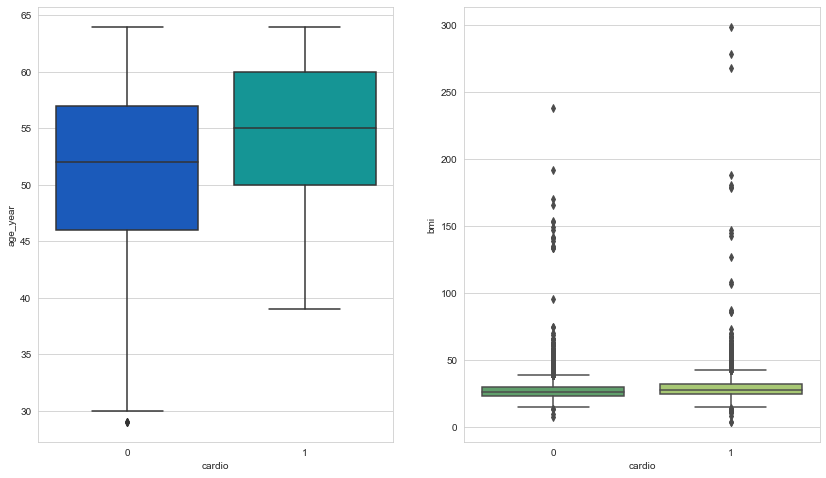

In [565]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='age_year',data=data,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='bmi',data=data,palette='summer')
plt.show()

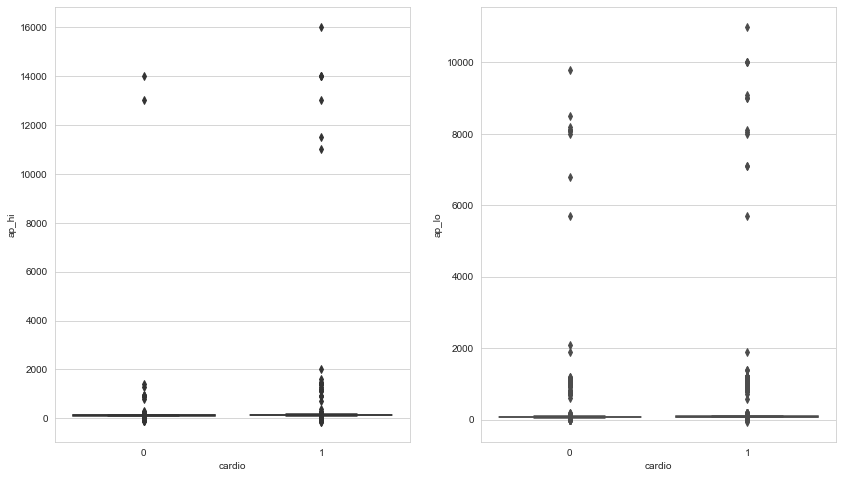

In [566]:
plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='ap_hi',data=data,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='ap_lo',data=data,palette='summer')
plt.show()

In [567]:
df_c0 = data[data['cardio'] == 0]

In [568]:
lista = ['ap_lo', 'ap_hi', 'bmi',"age_year"]
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c0[e].quantile(0.25)
    Q3 = df_c0[e].quantile(0.75)
    IQR = Q3 - Q1
    
    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)
    
    df_quartil[e]= [minimo, maximo]
    
df_quartil

,ap_lo,ap_hi,bmi,age_year
Q minimo,55.00,95.00,14.15,29.50
Q maximo,95.00,135.00,38.55,73.50


In [569]:
outlier_c0 = df_c0[(df_c0['ap_lo']!=80)|(df_c0['ap_hi']>120)|(df_c0['ap_hi']<120)|(df_c0['age_year']>70)|(df_c0['age_year']<30)| (df_c0['bmi']>33)|(df_c0['bmi']<18)].index
df_c0.drop(outlier_c0, inplace=True)

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [570]:
df_c0.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_year
count,8639.00,8639.00,8639.00,8639.00,8639.00,8639.00,8639.00,8639.00,8639.00,8639.00,8639.00
mean,1.46,120.00,80.00,1.23,1.22,0.14,0.08,0.76,0.00,25.56,51.19
std,0.50,0.00,0.00,0.54,0.58,0.34,0.26,0.43,0.00,3.27,6.91
min,1.00,120.00,80.00,1.00,1.00,0.00,0.00,0.00,0.00,18.00,39.00
25%,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,23.20,46.00
50%,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,25.20,52.00
75%,2.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,0.00,27.80,57.00
max,2.00,120.00,80.00,3.00,3.00,1.00,1.00,1.00,0.00,33.00,64.00


In [571]:
df_c1 = data[data['cardio'] == 1]

In [572]:
lista = ['ap_lo', 'ap_hi', 'bmi']
df_quartil = pd.DataFrame(index=['Q minimo', 'Q maximo'])

for e in lista:
    Q1 = df_c1[e].quantile(0.25)
    Q3 = df_c1[e].quantile(0.75)
    IQR = Q3 - Q1
    
    minimo = Q1 - (1.5 * IQR)
    maximo = Q3+ (1.5 * IQR)
    
    df_quartil[e]= [minimo, maximo]
    
df_quartil

,ap_lo,ap_hi,bmi
Q minimo,65.00,75.00,13.80
Q maximo,105.00,195.00,42.60


In [573]:
outlier_c1 = df_c1[(df_c1['ap_lo']>100)|(df_c1['ap_lo']<70)|(df_c1['ap_hi']>170)|(df_c1['ap_hi']<90)|(df_c1['bmi']>40)|(df_c1['bmi']<16)].index
df_c1.drop(outlier_c1, inplace=True)

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [574]:
df_c1.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_year
count,28390.00,28390.00,28390.00,28390.00,28390.00,28390.00,28390.00,28390.00,28390.00,28390.00,28390.00
mean,1.37,133.36,84.54,1.54,1.29,0.09,0.06,0.78,1.00,28.03,54.39
std,0.48,14.99,8.08,0.79,0.64,0.29,0.23,0.41,0.00,4.61,6.43
min,1.00,90.00,70.00,1.00,1.00,0.00,0.00,0.00,1.00,16.00,39.00
25%,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,1.00,24.50,50.00
50%,1.00,130.00,80.00,1.00,1.00,0.00,0.00,1.00,1.00,27.40,55.00
75%,2.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00,31.20,60.00
max,2.00,170.00,100.00,3.00,3.00,1.00,1.00,1.00,1.00,40.00,64.00


In [575]:
data = pd.concat([df_c0, df_c1])

In [576]:
df = pd.melt(data,id_vars='cardio', value_vars=['age_year', 'ap_hi', 'ap_lo', 'bmi'],  var_name='colunas', value_name='valores', col_level=None)

<AxesSubplot:xlabel='colunas', ylabel='valores'>

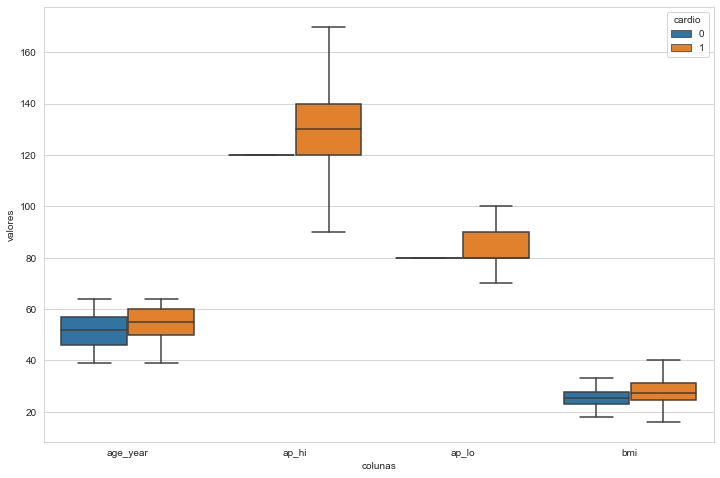

In [577]:
plt.figure(figsize=(12,8))
sns.boxplot(x='colunas', y='valores', hue='cardio', data=df)

<AxesSubplot:xlabel='colunas', ylabel='valores'>

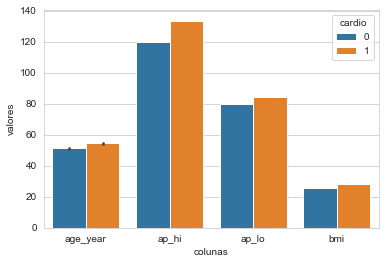

In [578]:
sns.barplot(x='colunas', y='valores', hue='cardio',data=df)

In [579]:
print("{} rows are same".format(data.duplicated().sum()))

0 rows are same


### **Missing Value Detection**

In [580]:
data.isnull().sum()

gender         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
bmi            0
age_year       0
dtype: int64

### **Missing Value Detection**

In [581]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_year
count,37029.00,37029.00,37029.00,37029.00,37029.00,37029.00,37029.00,37029.00,37029.00,37029.00,37029.00
mean,1.39,130.24,83.48,1.47,1.27,0.10,0.06,0.78,0.77,27.46,53.64
std,0.49,14.29,7.33,0.75,0.62,0.30,0.24,0.42,0.42,4.46,6.69
min,1.00,90.00,70.00,1.00,1.00,0.00,0.00,0.00,0.00,16.00,39.00
25%,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,1.00,24.10,49.00
50%,1.00,120.00,80.00,1.00,1.00,0.00,0.00,1.00,1.00,26.80,54.00
75%,2.00,140.00,90.00,2.00,1.00,0.00,0.00,1.00,1.00,30.40,59.00
max,2.00,170.00,100.00,3.00,3.00,1.00,1.00,1.00,1.00,40.00,64.00


# Visualization 

In [582]:
data.cardio.value_counts()

1    28390
0     8639
Name: cardio, dtype: int64

In [583]:
categorical_val = []
continous_val = []
for column in data.columns:
    if len(data[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [584]:
categorical_val

['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

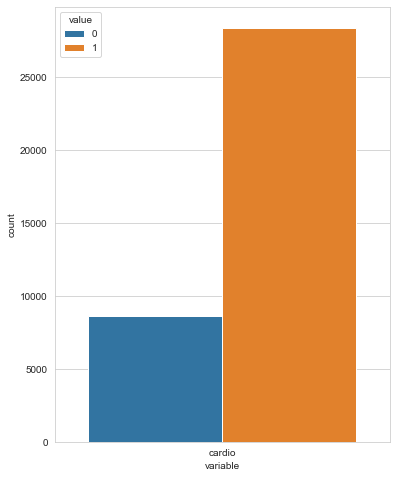

In [585]:
plt.figure(figsize=(6,8))
dataframe_categorical = data.loc[:,['cardio']]
sns.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));

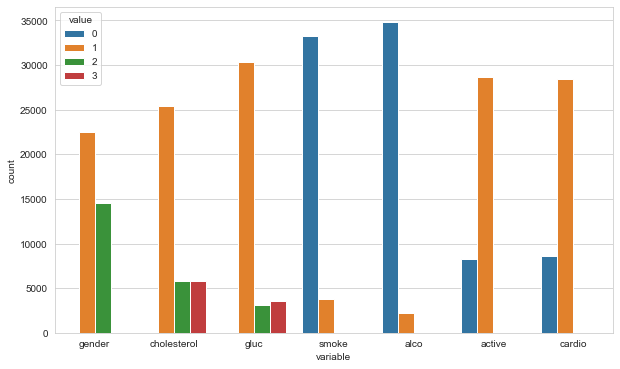

In [586]:
plt.figure(figsize=(10,6))
dataframe_categorical = data.loc[:,['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']]
sns.countplot(x="variable", hue="value",data= pd.melt(dataframe_categorical));

sex=[1 = male, 0 = female]
chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]
Fasting Blood Sugar=[1 = true, 0 = false]
Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]
Exercise induced Angina =[1 = yes; 0 = no]
Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]
=[0=,1=,2=,3=,4=]
=[0=,1=,2=,3=]
=[0=,1=]


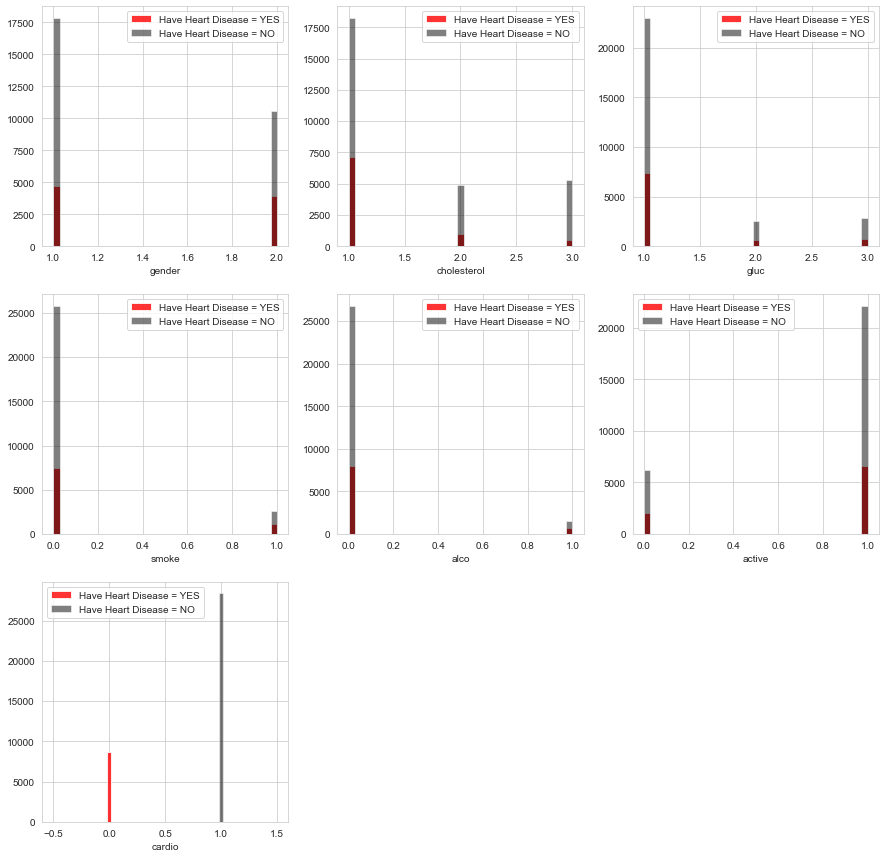

In [587]:
plt.figure(figsize=(15, 15))
print ("sex=[1 = male, 0 = female]")
print ("chest pain type =[0=Typical angina, 1=Atypical angina, 2=Non-anginal pain, 3=Asymptomatic]")
print ("Fasting Blood Sugar=[1 = true, 0 = false]")
print ("Resting Electrocardiographic=[0 = Normal, 1 = Non-Normal, 2 = Risk]")
print ("Exercise induced Angina =[1 = yes; 0 = no]")
print ("Peak Exercise=[0= better heart rate with excercise 1=typical healthy heart, 2=signs of unhealthy heart]")
print ("=[0=,1=,2=,3=,4=]")
print ("=[0=,1=,2=,3=]")
print ("=[0=,1=]")
for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    data[data["cardio"] == 0][column].hist(bins=35, color='Red', label='Have Heart Disease = YES', alpha=.8)
    data[data["cardio"] == 1][column].hist(bins=35, color='Black', label='Have Heart Disease = NO', alpha=.5)
    plt.legend()
    plt.xlabel(column)

In [588]:
continous_val

['ap_hi', 'ap_lo', 'bmi', 'age_year']

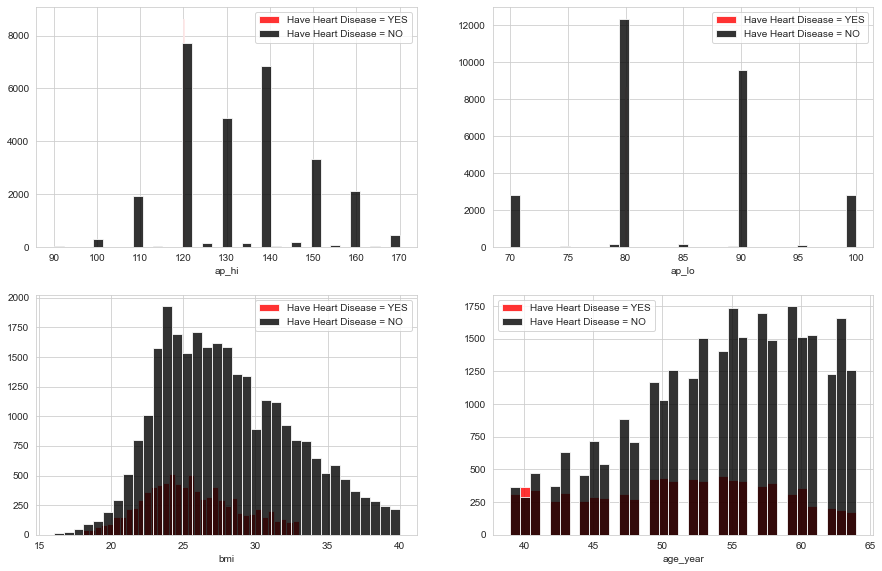

In [589]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    data[data["cardio"] == 0][column].hist(bins=35, color='Red', label='Have Heart Disease = YES', alpha=.8)
    data[data["cardio"] == 1][column].hist(bins=35, color='Black', label='Have Heart Disease = NO', alpha=.8)
    plt.legend()
    plt.xlabel(column)

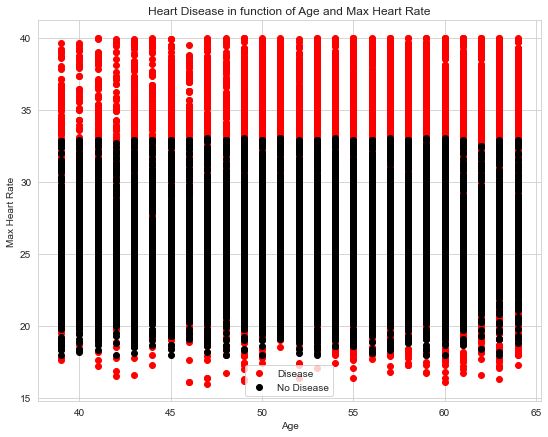

In [590]:
# Create another figure
plt.figure(figsize=(9, 7))

# Scatter with postivie examples
plt.scatter(data.age_year[data.cardio==1],
            data.bmi[data.cardio==1],
            c="red")

# Scatter with negative examples
plt.scatter(data.age_year[data.cardio==0],
            data.bmi[data.cardio==0],
            c="black")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

In [591]:
data.corr()

,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,age_year
gender,1.00,-0.01,0.01,-0.08,-0.05,0.34,0.17,0.02,-0.08,-0.12,-0.06
ap_hi,-0.01,1.00,0.68,0.12,0.02,0.00,0.02,0.05,0.40,0.22,0.12
ap_lo,0.01,0.68,1.00,0.09,0.02,0.01,0.03,0.03,0.26,0.19,0.05
cholesterol,-0.08,0.12,0.09,1.00,0.43,-0.01,0.02,0.05,0.18,0.15,0.13
gluc,-0.05,0.02,0.02,0.43,1.00,-0.03,-0.01,0.02,0.04,0.08,0.09
smoke,0.34,0.00,0.01,-0.01,-0.03,1.00,0.34,0.04,-0.06,-0.04,-0.07
alco,0.17,0.02,0.03,0.02,-0.01,0.34,1.00,0.04,-0.04,0.01,-0.04
active,0.02,0.05,0.03,0.05,0.02,0.04,0.04,1.00,0.02,0.02,0.00
cardio,-0.08,0.40,0.26,0.18,0.04,-0.06,-0.04,0.02,1.00,0.23,0.20
bmi,-0.12,0.22,0.19,0.15,0.08,-0.04,0.01,0.02,0.23,1.00,0.09


(11.05, -0.05)

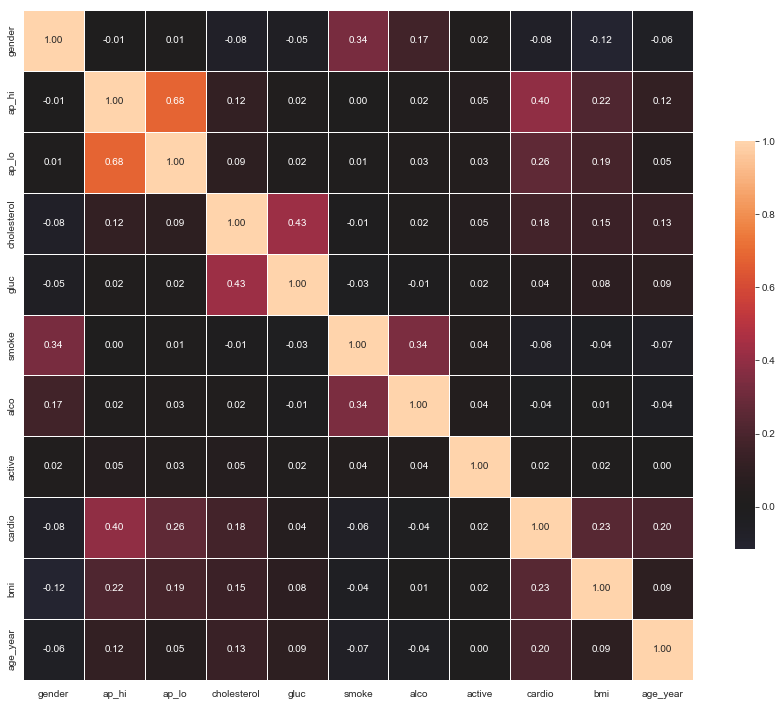

In [592]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, center=0, square=True, linewidths=.5, fmt=".2f", annot=True, cbar_kws={"shrink": .5});

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.05, top - 0.05)

- `fbs` and `chol` are the lowest correlated with the target variable.
- All other variables have a significant correlation with the target variable.

# Data Processing

After exploring the dataset, I observed that I need to convert some categorical variables into dummy variables and scale all the values before training the Machine Learning models.
First, I'll use the `get_dummies` method to create dummy columns for categorical variables.

In [593]:
categorical_val.remove('cardio')
dataset = pd.get_dummies(data, columns = categorical_val)

In [594]:
dataset

,ap_hi,ap_lo,cardio,bmi,age_year,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
5,120,80,0,29.40,60,1,0,0,1,0,0,1,0,1,0,1,0,1,0
10,120,80,0,28.00,61,1,0,1,0,0,1,0,0,1,0,1,0,0,1
11,120,80,0,20.00,51,0,1,1,0,0,1,0,0,1,0,1,0,0,1
12,120,80,0,22.00,40,0,1,1,0,0,1,0,0,1,0,1,0,1,0
20,120,80,0,31.20,54,0,1,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69990,110,70,1,25.50,41,1,0,1,0,0,1,0,0,1,0,1,0,0,1
69992,170,90,1,21.60,51,1,0,1,0,0,1,0,0,1,0,1,0,0,1
69993,130,90,1,23.70,53,1,0,1,0,0,1,0,0,1,0,1,0,0,1
69994,150,80,1,29.40,57,1,0,1,0,0,1,0,0,1,0,1,0,0,1


In [595]:
print(data.columns)
print(dataset.columns)

Index(['gender', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio', 'bmi', 'age_year'],
      dtype='object')
Index(['ap_hi', 'ap_lo', 'cardio', 'bmi', 'age_year', 'gender_1', 'gender_2',
       'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2',
       'gluc_3', 'smoke_0', 'smoke_1', 'alco_0', 'alco_1', 'active_0',
       'active_1'],
      dtype='object')


# Data Transform into StandardScaler

In [596]:
from sklearn.preprocessing import StandardScaler

s_sc = StandardScaler()
col_to_scale = ['ap_hi', 'ap_lo', 'bmi', 'age_year', 'gender_1', 'gender_2',
       'cholesterol_1', 'cholesterol_2', 'cholesterol_3', 'gluc_1', 'gluc_2',
       'gluc_3', 'smoke_0', 'smoke_1', 'alco_0', 'alco_1', 'active_0',
       'active_1']
dataset[col_to_scale] = s_sc.fit_transform(dataset[col_to_scale])

In [597]:
dataset

,ap_hi,ap_lo,cardio,bmi,age_year,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
5,-0.72,-0.48,0,0.44,0.95,0.80,-0.80,-1.48,2.31,-0.43,-2.14,3.28,-0.32,0.34,-0.34,0.25,-0.25,1.86,-1.86
10,-0.72,-0.48,0,0.12,1.10,0.80,-0.80,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,-0.54,0.54
11,-0.72,-0.48,0,-1.67,-0.40,-1.25,1.25,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,-0.54,0.54
12,-0.72,-0.48,0,-1.22,-2.04,-1.25,1.25,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,1.86,-1.86
20,-0.72,-0.48,0,0.84,0.05,-1.25,1.25,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,-0.54,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69990,-1.42,-1.84,1,-0.44,-1.89,0.80,-0.80,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,-0.54,0.54
69992,2.78,0.89,1,-1.31,-0.40,0.80,-0.80,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,-0.54,0.54
69993,-0.02,0.89,1,-0.84,-0.10,0.80,-0.80,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,-0.54,0.54
69994,1.38,-0.48,1,0.44,0.50,0.80,-0.80,0.68,-0.43,-0.43,0.47,-0.30,-0.32,0.34,-0.34,0.25,-0.25,-0.54,0.54


## **Model prepration**

In [598]:
from sklearn.model_selection import train_test_split

X = dataset.drop("cardio", axis = 1)

y = dataset["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [599]:
print('Train set shape is',format(X_train.shape))
print('Test set shape is',format(X_test.shape))

Train set shape is (29623, 18)
Test set shape is (7406, 18)


In [600]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

## 1. Logistic Regression

In [601]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 76.98%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    0.50     0.81      0.77       0.66          0.74
recall       0.31     0.91      0.77       0.61          0.77
f1-score     0.38     0.86      0.77       0.62          0.75
support   6855.00 22768.00      0.77   29623.00      29623.00
_______________________________________________
Confusion Matrix: 
 [[ 2126  4729]
 [ 2090 20678]]

Test Result:
Accuracy Score: 76.14%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.51    0.80      0.76       0.66          0.73
recall       0.30    0.91      0.76       0.60          0.76
f1-score     0.38    0.85      0.76       0.61          0.74
support   1784.00 5622.00      0.76    7406.00       7406.00
_______________________________________________
Confusion Matrix: 
 [[

# Confusion Matrix

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

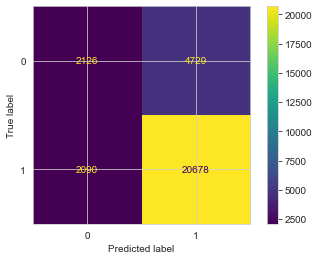

In [602]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lr_clf, X_train, y_train)  
plt.show()


C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

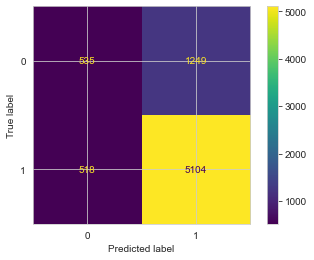

In [603]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(lr_clf, X_test, y_test) 

plt.show()

# Roc Curve 

In [604]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = lr_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_lr_clf,true_positive_rate_lr_clf,threshold_lr_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8415211082183542

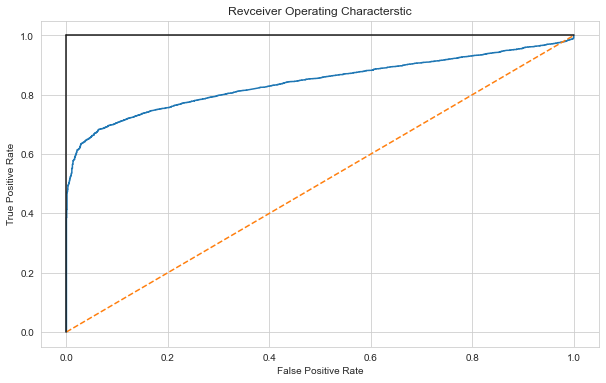

In [605]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [606]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.98,76.14


## 2. K-nearest neighbors

In [607]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 88.14%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    0.71     0.94      0.88       0.83          0.89
recall       0.81     0.90      0.88       0.86          0.88
f1-score     0.76     0.92      0.88       0.84          0.88
support   6855.00 22768.00      0.88   29623.00      29623.00
_______________________________________________
Confusion Matrix: 
 [[ 5577  1278]
 [ 2236 20532]]

Test Result:
Accuracy Score: 81.42%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.61    0.89      0.81       0.75          0.82
recall       0.65    0.87      0.81       0.76          0.81
f1-score     0.63    0.88      0.81       0.75          0.82
support   1784.00 5622.00      0.81    7406.00       7406.00
_______________________________________________
Confusion Matrix: 
 [[

# Confusion Matrix

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

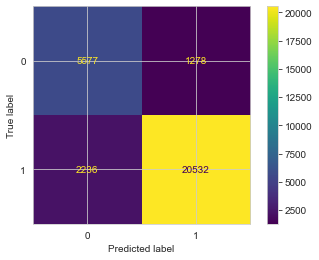

In [608]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(knn_clf, X_train, y_train)  
plt.show()

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

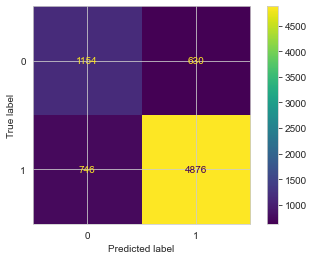

In [609]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(knn_clf, X_test, y_test) 

plt.show()

# Roc Curve 

In [610]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = knn_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_knn_clf,true_positive_rate_knn_clf,threshold_knn_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8900405577543699

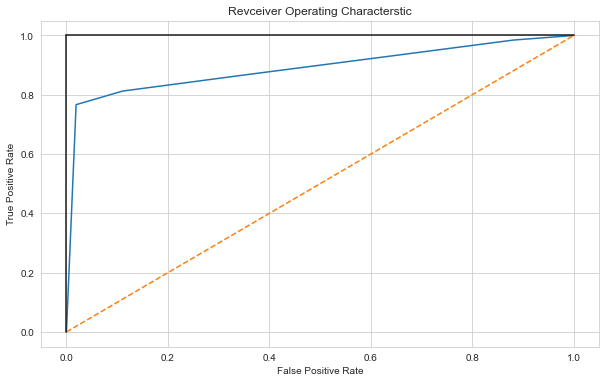

In [611]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [612]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.98,76.14
1,K-nearest neighbors,88.14,81.42


## 3. Support Vector machine

In [613]:
from sklearn.svm import SVC

svm_clf = SVC(gamma=0.1, C=1, probability=True,)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.03%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    0.65     0.93      0.85       0.79          0.86
recall       0.77     0.87      0.85       0.82          0.85
f1-score     0.70     0.90      0.85       0.80          0.85
support   6855.00 22768.00      0.85   29623.00      29623.00
_______________________________________________
Confusion Matrix: 
 [[ 5279  1576]
 [ 2859 19909]]

Test Result:
Accuracy Score: 84.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.65    0.91      0.84       0.78          0.85
recall       0.73    0.87      0.84       0.80          0.84
f1-score     0.69    0.89      0.84       0.79          0.84
support   1784.00 5622.00      0.84    7406.00       7406.00
_______________________________________________
Confusion Matrix: 
 [[

# Confusion Matrix

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

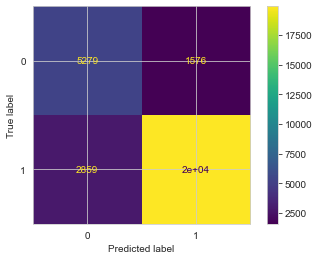

In [614]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(svm_clf, X_train, y_train)  
plt.show()

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

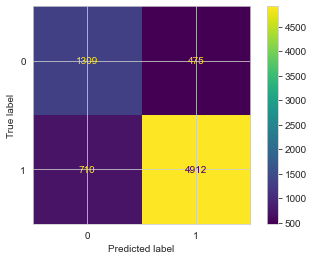

In [615]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(svm_clf, X_test, y_test) 
plt.show()

# Roc Curve

In [616]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = svm_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_svm_clf,true_positive_rate_svm_clf,threshold_svm_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9121278234290975

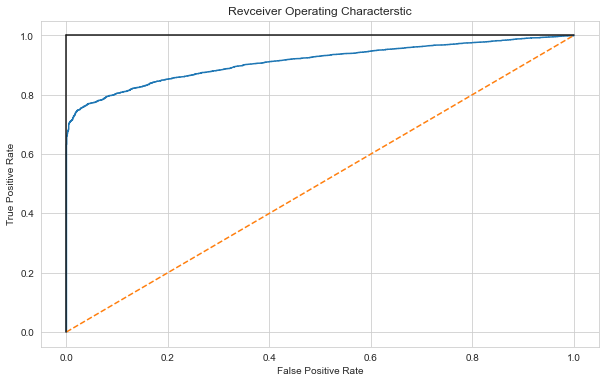

In [617]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [618]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.98,76.14
1,K-nearest neighbors,88.14,81.42
2,Support Vector Machine,85.03,84.00


## 4. Decision Tree Classifier 

In [619]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.27%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    0.83     1.00      0.95       0.92          0.96
recall       1.00     0.94      0.95       0.97          0.95
f1-score     0.91     0.97      0.95       0.94          0.95
support   6855.00 22768.00      0.95   29623.00      29623.00
_______________________________________________
Confusion Matrix: 
 [[ 6855     0]
 [ 1402 21366]]

Test Result:
Accuracy Score: 79.07%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.57    0.86      0.79       0.71          0.79
recall       0.55    0.87      0.79       0.71          0.79
f1-score     0.56    0.86      0.79       0.71          0.79
support   1784.00 5622.00      0.79    7406.00       7406.00
_______________________________________________
Confusion Matrix: 
 [[

# Confusion Matrix

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

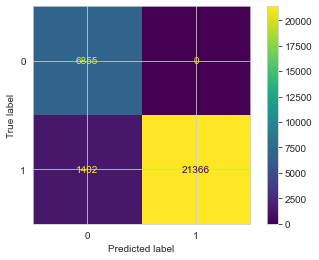

In [620]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(tree_clf, X_train, y_train)  
plt.show()

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

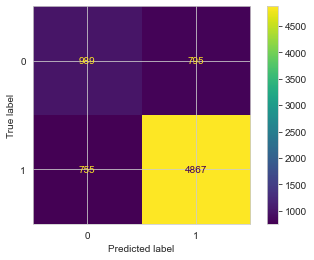

In [621]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(tree_clf, X_test, y_test) 
plt.show()

# Roc Curve

In [622]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = tree_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_tree_clf,true_positive_rate_tree_clf,threshold_tree_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.7079056513249518

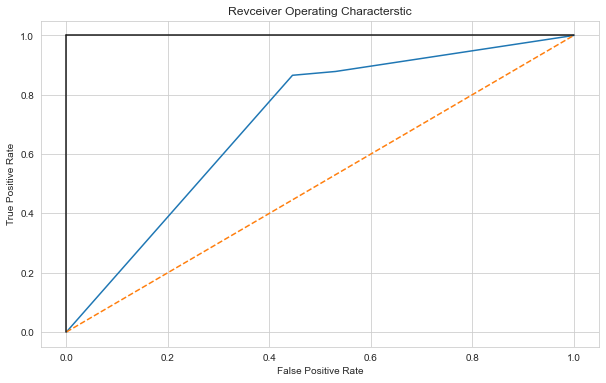

In [623]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [624]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.98,76.14
1,K-nearest neighbors,88.14,81.42
2,Support Vector Machine,85.03,84.00
3,Decision Tree Classifier,95.27,79.07


## 5. Random Forest

In [625]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 95.27%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    0.88     0.98      0.95       0.93          0.95
recall       0.92     0.96      0.95       0.94          0.95
f1-score     0.90     0.97      0.95       0.93          0.95
support   6855.00 22768.00      0.95   29623.00      29623.00
_______________________________________________
Confusion Matrix: 
 [[ 6315   540]
 [  862 21906]]

Test Result:
Accuracy Score: 79.44%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision    0.58    0.86      0.79       0.72          0.79
recall       0.56    0.87      0.79       0.71          0.79
f1-score     0.57    0.87      0.79       0.72          0.79
support   1784.00 5622.00      0.79    7406.00       7406.00
_______________________________________________
Confusion Matrix: 
 [[

# Confusion Matrix

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

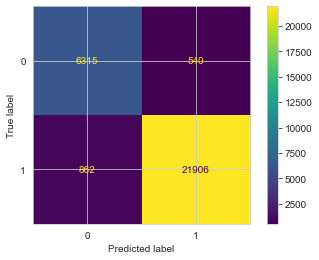

In [626]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(rf_clf, X_train, y_train)  
plt.show()

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

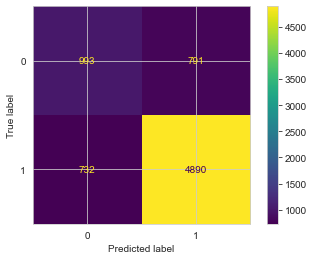

In [627]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(rf_clf, X_test, y_test) 
plt.show()

# Roc Curve

In [628]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = rf_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_rf_clf,true_positive_rate_rf_clf,threshold_rf_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.8881705020953875

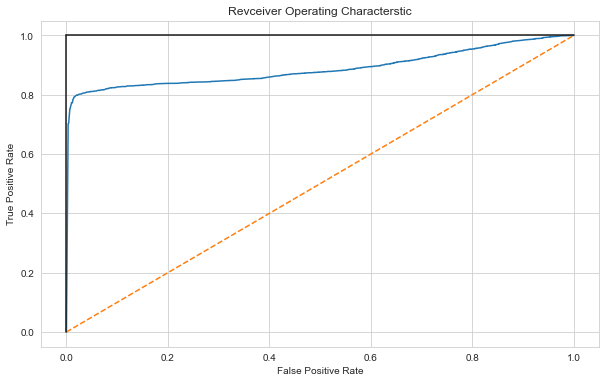

In [629]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [630]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.98,76.14
1,K-nearest neighbors,88.14,81.42
2,Support Vector Machine,85.03,84.00
3,Decision Tree Classifier,95.27,79.07
4,Random Forest Classifier,95.27,79.44


## 6. XGBoost Classifer

In [631]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train Result:
Accuracy Score: 88.61%
_______________________________________________
CLASSIFICATION REPORT:
                0        1  accuracy  macro avg  weighted avg
precision    0.70     0.96      0.89       0.83          0.90
recall       0.88     0.89      0.89       0.89          0.89
f1-score     0.78     0.92      0.89       0.85          0.89
support   6855.00 22768.00      0.89   29623.00      29623.00
_______________________________________________
Confusion Matrix: 
 [[ 6064   791]
 [ 2583 20185]]

Test Result:
Accuracy Score: 84.89%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
prec

# Confusion Matrix

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

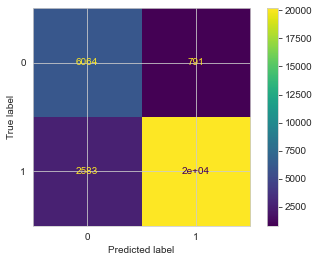

In [632]:
from sklearn.metrics import plot_confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(xgb_clf, X_train, y_train)  
plt.show()

C:\Users\Md.Shakhawat Kabir\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 432x432 with 0 Axes>

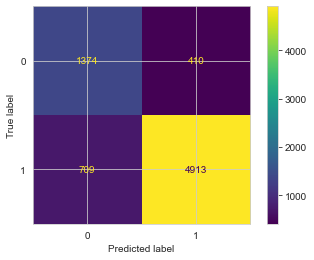

In [633]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(6, 6))
plot_confusion_matrix(xgb_clf, X_test, y_test) 
plt.show()

# Roc Curve

In [634]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
#Get predicted probabilites from the model
y_probabilities = xgb_clf.predict_proba(X_test)[:,1]
#Create true and false positive rates
false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,threshold_xgb_clf = roc_curve(y_test,y_probabilities)
#Calculate area under the curve
roc_auc_score(y_test,y_probabilities)

0.9221103273016161

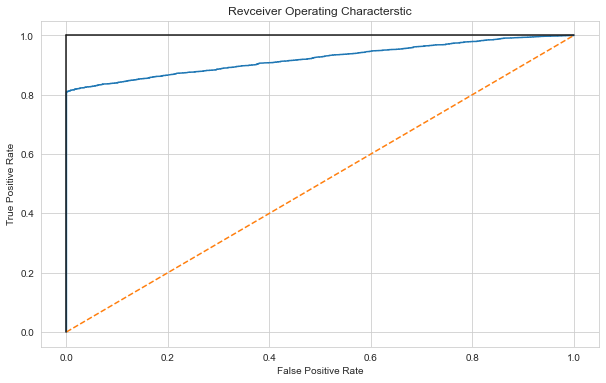

In [635]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(10,6))
plt.title('Revceiver Operating Characterstic')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf)
plt.plot([0,1],ls='--')
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [636]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,76.98,76.14
1,K-nearest neighbors,88.14,81.42
2,Support Vector Machine,85.03,84.00
3,Decision Tree Classifier,95.27,79.07
4,Random Forest Classifier,95.27,79.44
5,XGBoost Classifier,88.61,84.89


# **Comparing ROC Curve of k-Nearest Neighbors, Logistic Regression and Decision Tree**

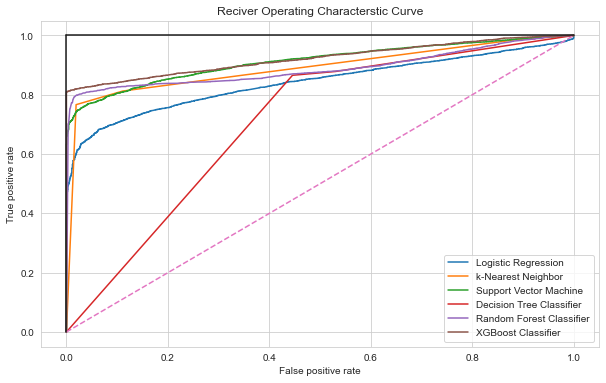

In [637]:
#Plot ROC Curve
sns.set_style('whitegrid')
plt.figure(figsize=(10,6))
plt.title('Reciver Operating Characterstic Curve')

plt.plot(false_positive_rate_lr_clf,true_positive_rate_lr_clf,label='Logistic Regression')
plt.plot(false_positive_rate_knn_clf,true_positive_rate_knn_clf,label='k-Nearest Neighbor')
plt.plot(false_positive_rate_svm_clf,true_positive_rate_svm_clf,label='Support Vector Machine')
plt.plot(false_positive_rate_tree_clf,true_positive_rate_tree_clf,label='Decision Tree Classifier')
plt.plot(false_positive_rate_rf_clf,true_positive_rate_rf_clf,label='Random Forest Classifier')
plt.plot(false_positive_rate_xgb_clf,true_positive_rate_xgb_clf,label='XGBoost Classifier')

plt.plot([0,1],ls='--',)
plt.plot([0,0],[1,0],c='.1')
plt.plot([1,1],c='.1')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.legend()
plt.show()